# Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale

## Hold-Out Method

In [2]:
data_clean = "../../data/clean/data_clean.csv"
random_split = 44
num_cols = ["Term","NoEmp","SecuredSBA","GrDisburs","GrApprov","ApprovSBA"]

In [3]:
df = pd.read_csv(data_clean, low_memory=False)

df_train, df_test = train_test_split(df, train_size=0.7, random_state=random_split)

In [4]:
pca_train = df_train[num_cols]
pca_test = df_test[num_cols]

print(f"Train: {pca_train.shape}")
print(f"Test:  {pca_test.shape}")

Train: (626226, 6)
Test:  (268383, 6)


## PCA: Principal Component Analysis

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con 𝑛 individuos cada uno con 𝑝 variables (𝑋1, 𝑋2, ..., 𝑋𝑝), es decir, el espacio muestral tiene 𝑝 dimensiones. PCA permite encontrar un número de factores subyacentes (𝑧 < 𝑝) que explican aproximadamente lo mismo que las 𝑝 variables originales. Donde antes se necesitaban 𝑝 valores para caracterizar a cada individuo, ahora bastan 𝑧 valores. Cada una de estas 𝑧 nuevas variables recibe el nombre de componente principal.

### PCA Pipeline

In [6]:
pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA())
    ])

pca_pipe.fit(pca_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

### Interpretation

In [7]:
pca_stage = pca_pipe.named_steps["pca"]

pd.DataFrame(
    columns = pca_train.columns,
    index   = np.arange(pca_stage.n_components_) + 1,
    data    = pca_stage.components_
)

,Term,NoEmp,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
1,0.364492,0.067143,0.243663,0.507008,0.520198,0.524978
2,-0.445933,0.119937,-0.790218,0.290844,0.239309,0.143025
3,0.001182,0.989922,0.097836,-0.066678,-0.061350,-0.047652
4,-0.817291,-0.034067,0.541246,0.084354,0.088101,0.151823
5,0.014070,-0.000009,0.108589,0.742047,-0.129439,-0.648554
6,0.011210,-0.000127,-0.043279,0.310093,-0.802399,0.507936


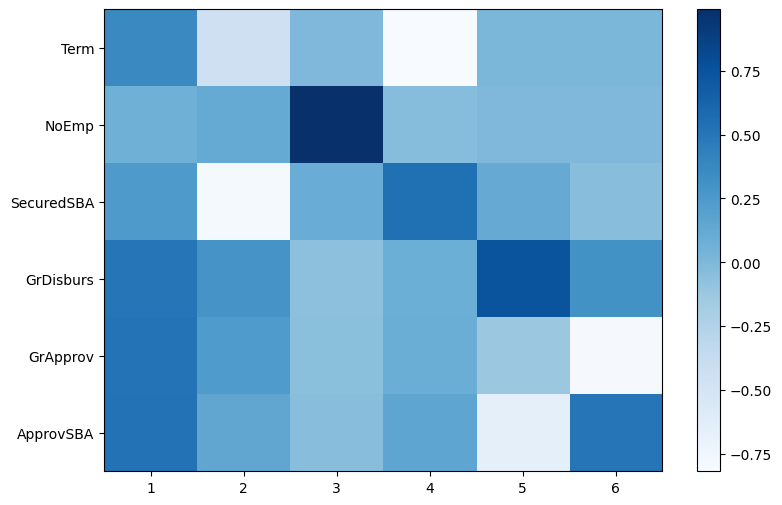

In [9]:
plt.figure(figsize=(9,6))

plt.imshow(pca_stage.components_.T, cmap="Blues", aspect="auto")
plt.xticks(range(len(pca_train.columns)), np.arange(pca_stage.n_components_) + 1)
plt.yticks(range(len(pca_train.columns)), pca_train.columns)

plt.colorbar()
plt.show()

### Explained Variance

In [10]:
print(pca_stage.explained_variance_ratio_)

[0.56859475 0.16987788 0.16486619 0.08584727 0.00825512 0.0025588 ]


In [11]:
print(pca_stage.explained_variance_ratio_.cumsum())

[0.56859475 0.73847263 0.90333882 0.98918609 0.9974412  1.        ]


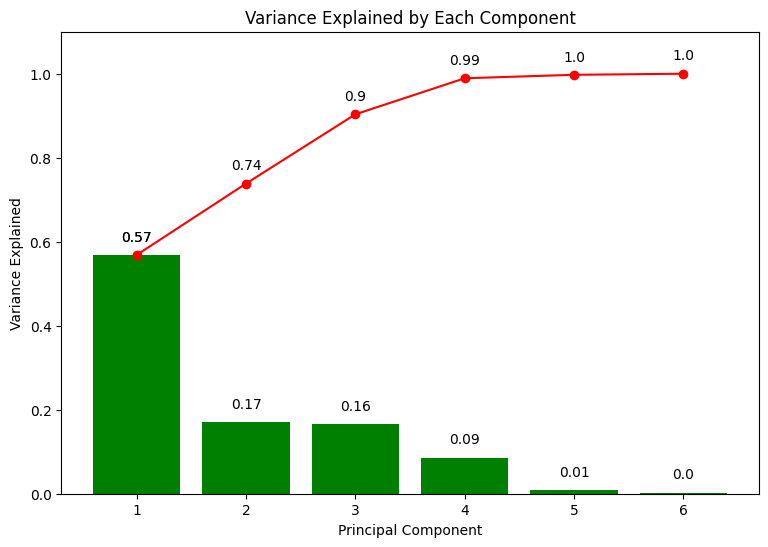

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title("Variance Explained by Each Component")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained")

ax.bar(np.arange(pca_stage.n_components_) + 1,
       pca_stage.explained_variance_ratio_,
       color = "green")

for x, y in zip(np.arange(len(pca_train.columns)) + 1, pca_stage.explained_variance_ratio_):
    ax.annotate(round(y,2), (x,y), textcoords="offset points", xytext=(0,10), ha="center")

ax.plot(np.arange(len(pca_train.columns)) + 1,
        pca_stage.explained_variance_ratio_.cumsum(),
        color="red", marker = "o")

for x, y in zip(np.arange(len(pca_train.columns)) + 1, pca_stage.explained_variance_ratio_.cumsum()):
    ax.annotate(round(y,2), (x,y), textcoords="offset points", xytext=(0,10), ha="center")

ax.set_xticks(np.arange(pca_stage.n_components_) + 1)
ax.set_ylim(0, 1.1)
plt.show()

### Transformation

In [13]:
pred_test = pca_pipe.transform(X=pca_test)

df_pred = pd.DataFrame(columns=np.arange(pca_stage.n_components_) + 1,
                       data=pred_test)
df_pred.head()

,1,2,3,4,5,6
0,4.340288,1.607230,-0.595908,0.917247,0.008086,-0.099485
1,-1.362606,0.687771,-0.122349,-0.566851,-0.124291,0.029102
2,-1.240767,0.748082,-0.084364,-0.545287,-0.106906,0.013038
3,-0.789576,-0.871960,0.079127,0.542399,0.066551,-0.037243
4,-0.196198,-0.625436,-0.026182,0.670820,-0.018599,-0.043370


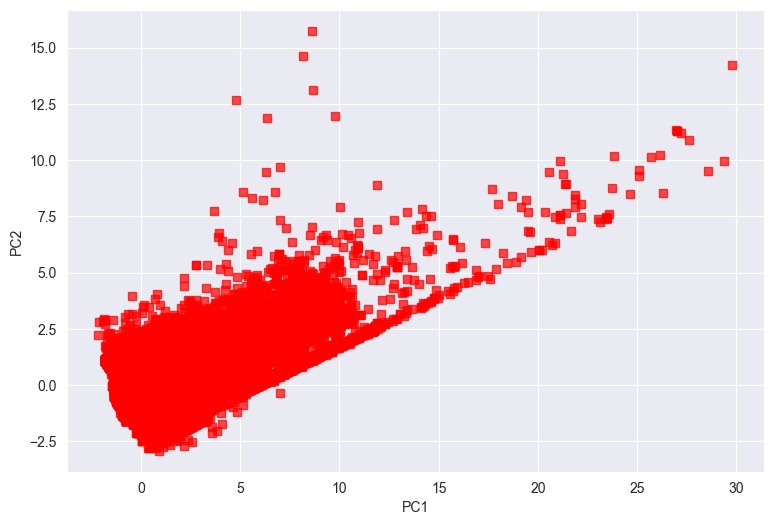

In [14]:
plt.figure(figsize=(9,6))
sns.set_style("darkgrid")
plt.scatter(df_pred[1], df_pred[2], color="red", marker="s", alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Reconstruction

In [15]:
pca_inv = pca_pipe.inverse_transform(df_pred)

df_inv = pd.DataFrame(columns=pca_test.columns,
                      data=pca_inv)

In [16]:
print("Valores Originales")
display(pca_test.head())

print("Valores Reconstruidos")
display(df_inv.head())

Valores Originales


,Term,NoEmp,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
813897,120,1,75,999900,999900,749925
675607,84,3,50,25000,25000,12500
679862,84,7,50,50000,50000,25000
514453,84,4,85,36000,36000,30600
468000,84,1,85,130000,150000,127500


Valores Reconstruidos


,Term,NoEmp,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
0,120.0,1.0,75.0,999900.0,999900.0,749925.0
1,84.0,3.0,50.0,25000.0,25000.0,12500.0
2,84.0,7.0,50.0,50000.0,50000.0,25000.0
3,84.0,4.0,85.0,36000.0,36000.0,30600.0
4,84.0,1.0,85.0,130000.0,150000.0,127500.0
